# Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về bệnh tiểu đường

## 1. Giới thiệu chung
- Bộ dữ liệu Pima Indians Diabetes bao gồm thông tin y tế của phụ nữ thuộc bộ tộc da đỏ Pima có khả năng mắc bệnh đái tháo đường (diabetes) hay không.
- Dữ liệu được thu thập để dự đoán khả năng mắc bệnh đái tháo đường dựa trên các chỉ số y sinh.

## 2. Mục tiêu
- Khám phá mối tương quan giữa các chỉ số y tế và khả năng mắc bệnh tiểu đường.
- Trực quan hóa dữ liệu thông qua biểu đồ phân bố, heatmap, boxplot, và pairplot.

## 3. Thông tin về dữ liệu

- 768 mẫu dữ liệu
- 9 biến (features): 8 biến độc lập + 1 biến phụ thuộc (Outcome)

| Biến | Mô tả | Đơn vị |
|--------|----------|-----------|
| Pregnancies | Số lần mang thai | - | 
| Glucose | Nồng độ glucose huyết tương sau 2 giờ trong nghiệm pháp dung nạp glucose | mg/dL |
| BloodPressure | Huyết áp tâm trương | mmHg |
| SkinThickness | Độ dày nếp gấp da | mm |
| Insulin | Nồng độ insulin huyết thanh | μU/ml |
| BMI | Chỉ số khối cơ thể = cân nặng/chiều cao² | kg/m² |
| DiabetesPedigreeFunction | Chỉ số nguy cơ di truyền bệnh đái tháo đường | - |
| Age | Tuổi | - |
| Outcome | 0 = không mắc bệnh đái tháo đường, 1 = mắc bệnh đái tháo đường | - |

## 4. Nạp và xem trước dữ liệu

### Import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Đọc dữ liệu

In [2]:
data = pd.read_csv("diabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("Kiểm tra dữ liệu và giá trị thiếu: ")
data.info()

Kiểm tra dữ liệu và giá trị thiếu: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét**
- Dữ liệu có 8 tính chất để phân lớp:
- Tổng số dòng dữ liệu là 768 dòng.
- Dữ liệu để phân lớp ở cột Outcome.
- Không có giá trị thiếu.

## 5. Trực quan hóa dữ liệu

### Histogram: Phân bố của các biến tình trạng mắc bệnh tiểu đường

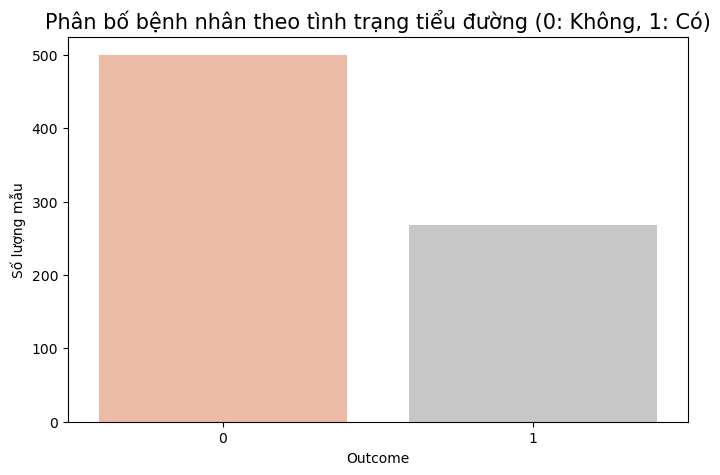

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outcome', hue='Outcome', data=data, palette='RdGy', legend=False)
plt.title('Phân bố bệnh nhân theo tình trạng tiểu đường (0: Không, 1: Có)', fontsize=15)
plt.ylabel('Số lượng mẫu')
plt.show()

**Nhận xét:**
- Số lượng người không mắc tiểu đường (Outcome = 0) nhiều hơn đáng kể so với mắc tiểu đường (Outcome = 1).

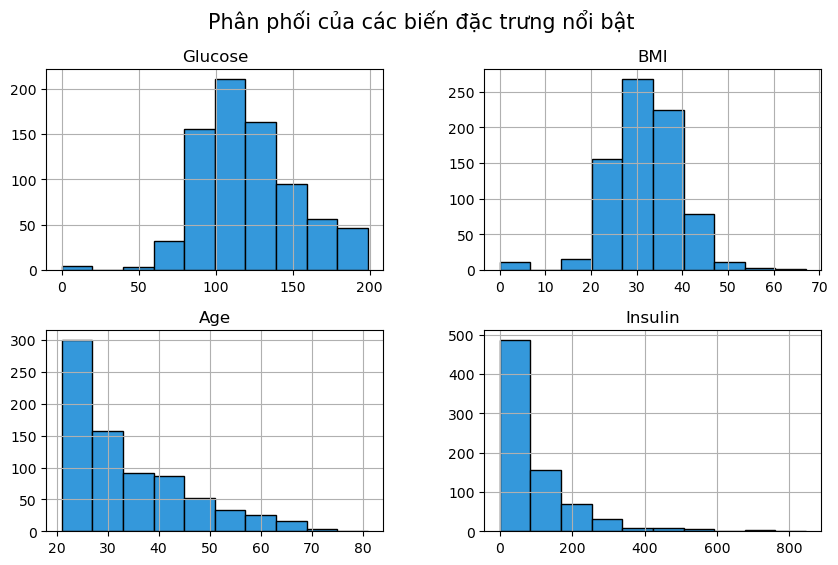

In [20]:
features = ['Glucose', 'BMI', 'Age', 'Insulin']
data[features].hist(figsize=(10, 6), color='#3498DB', edgecolor='black')
plt.suptitle('Phân phối của các biến đặc trưng nổi bật', fontsize=15)
plt.show()

**Nhận xét:**
- Phân phối của Glucose và BMI hơi lệch phải, cho thấy có nhiều người có giá trị cao hơn trung bình — đặc biệt ở nhóm mắc tiểu đường.
- Biến Age phân bố đều hơn, còn Insulin có nhiều giá trị thấp, phản ánh dữ liệu thực tế không cân đối.

### Ma trận tương quan

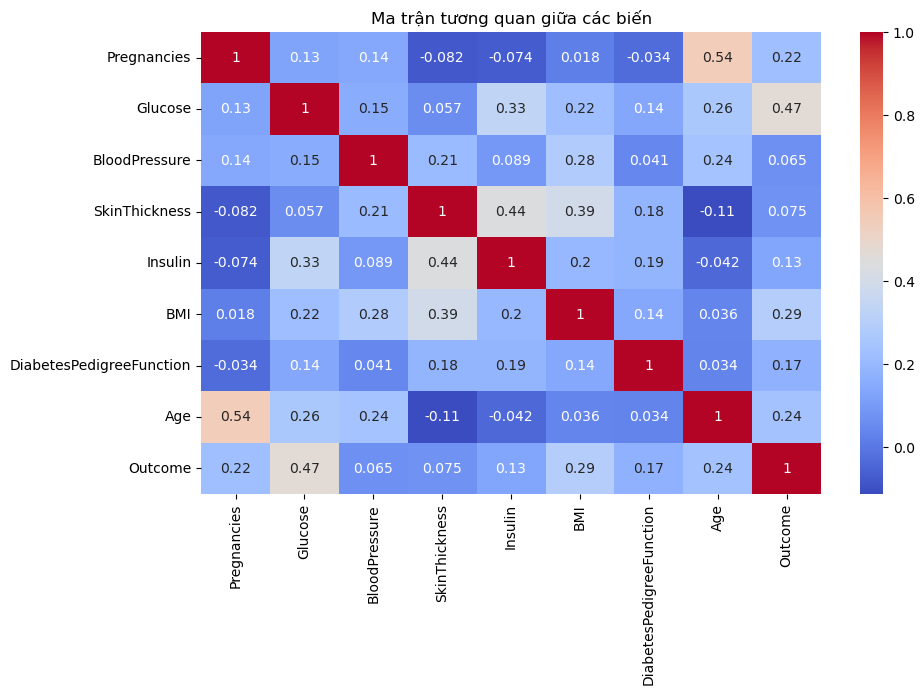

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan giữa các biến')
plt.show()

**Nhận xét:**
- Biến Glucose có tương quan mạnh nhất với Outcome, cho thấy mức đường huyết cao làm tăng khả năng mắc tiểu đường.
- Các biến như BMI và Age cũng có mức tương quan đáng kể.

### Boxplot: Phân bố Glucode theo tình trạng tiểu đường

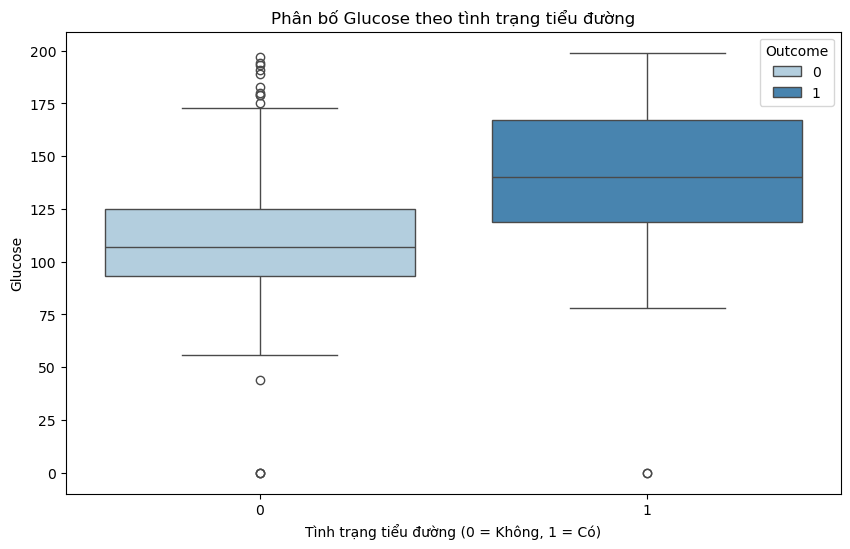

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Outcome', y='Glucose', palette='Blues', hue='Outcome')
plt.title('Phân bố Glucose theo tình trạng tiểu đường')
plt.xlabel('Tình trạng tiểu đường (0 = Không, 1 = Có)')
plt.ylabel('Glucose')
plt.show()

**Nhận xét:**
- Giá trị Glucose trung bình ở nhóm mắc tiểu đường (Outcome = 1) cao hơn rõ rệt so với nhóm không mắc, cho thấy đây là biến quan trọng nhất trong việc phân loại nguy cơ tiểu đường.

### Phân phối của một số biến quan trọng theo Outcome

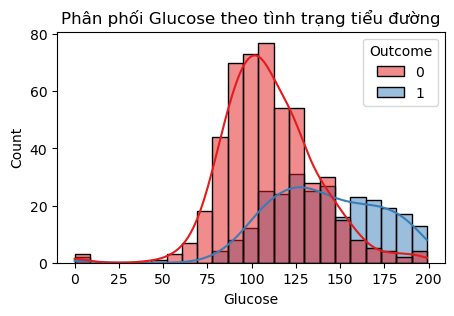

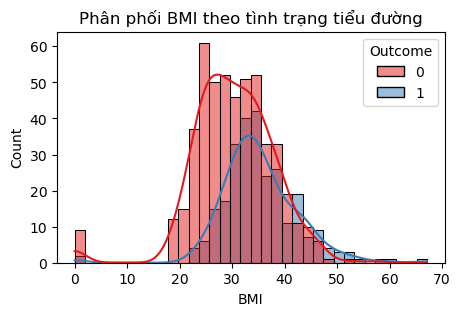

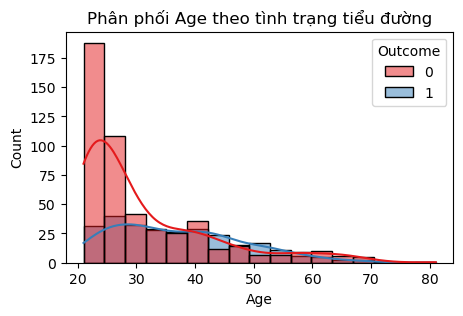

In [22]:
features = ['Glucose', 'BMI', 'Age']
for f in features:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=data, x=f, hue='Outcome', kde=True, palette='Set1')
    plt.title(f'Phân phối {f} theo tình trạng tiểu đường')
    plt.show()

**Nhận xét:**
- Người mắc tiểu đường thường có Glucose và BMI cao hơn.
- Tuổi cao cũng là yếu tố làm tăng nguy cơ mắc bệnh.

### Scatter plot: Mối quan hệ giữa glucose và BMI

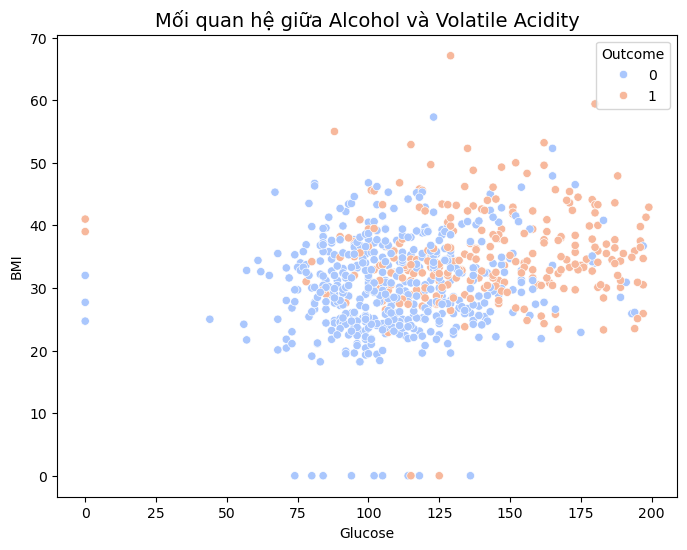

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=data, palette='coolwarm')
plt.title('Mối quan hệ giữa Alcohol và Volatile Acidity', fontsize=14)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(title='Outcome')
plt.show()

**Nhận xét:**
- Biểu đồ cho thấy người mắc tiểu đường (Outcome = 1) thường có mức Glucose cao hơn và BMI lớn hơn so với người không mắc (Outcome = 0).
- Điều này gợi ý rằng nồng độ đường huyết và chỉ số khối cơ thể là hai yếu tố quan trọng liên quan đến nguy cơ tiểu đường.

### Pairplot: Mối quan hệ giữa các biến

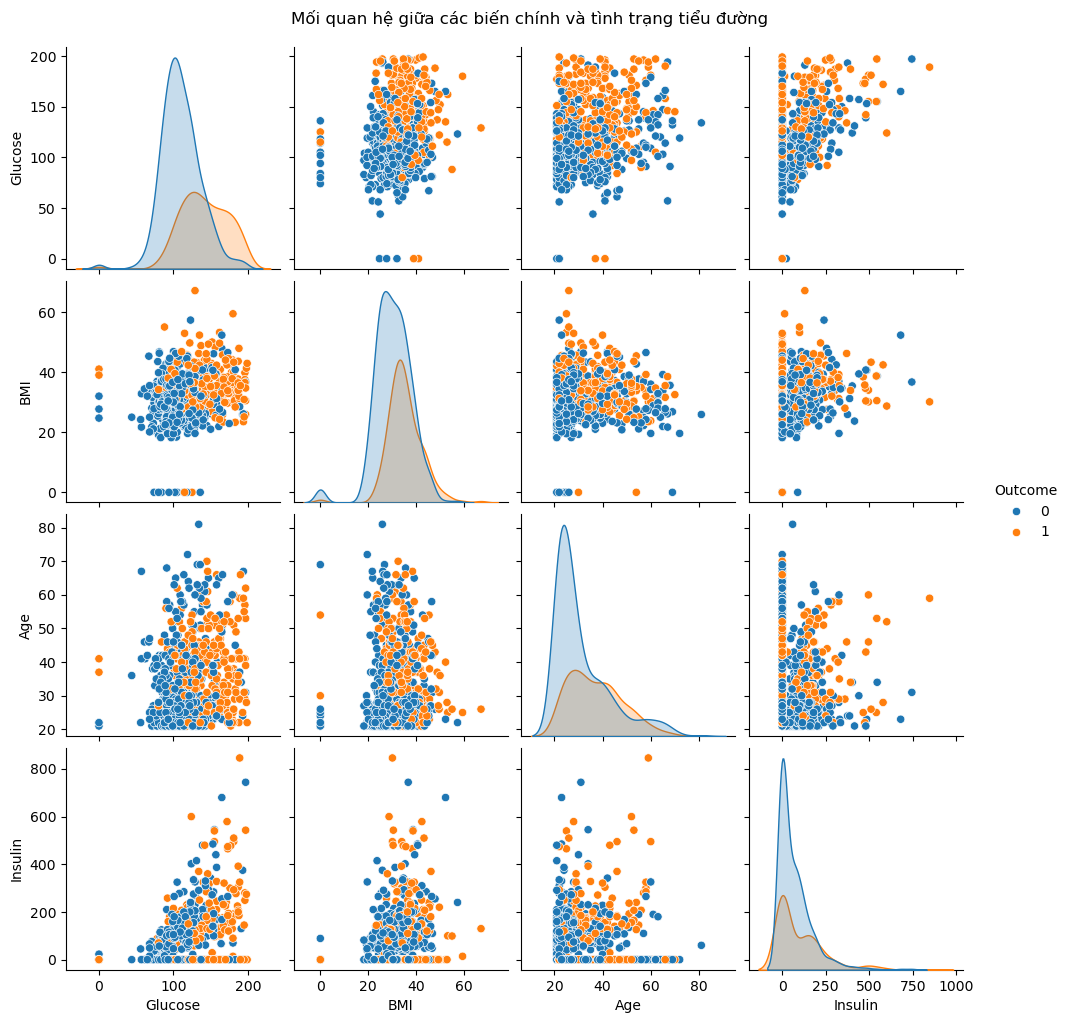

In [13]:
sns.pairplot(data[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']], hue='Outcome', diag_kind='kde')
plt.suptitle('Mối quan hệ giữa các biến chính và tình trạng tiểu đường', y=1.02)
plt.show()

**Nhận xét:**
- Các nhóm bệnh nhân có tiểu đường (Outcome = 1) có xu hướng tập trung ở vùng có Glucose, BMI, và Insulin cao hơn — cho thấy sự khác biệt rõ rệt về đặc trưng sinh học.